In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
file_path = '/content/drive/MyDrive/Colab Notebooks/BankNote_Authentication.csv'
my_df = pd.read_csv(file_path)
my_df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [7]:
# Setting up input and target dataset
inputs = my_df.drop(columns=['class'])
target = my_df['class']
inputs.shape, target.shape

((1372, 4), (1372,))

In [9]:
# Taking care of missiing values
from sklearn.impute import SimpleImputer

# Initialize SimpleImputer with strategy 'mean' (or 'median' or 'most_frequent')
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the input data
inputs = imputer.fit_transform(inputs)
inputs.shape, target.shape

((1372, 4), (1372,))

In [10]:
# Spliiting the datasets into train and test
from sklearn.model_selection import train_test_split
inputs_train, inputs_test, target_train, target_test = train_test_split(inputs, target, test_size=0.2, random_state=88)
print("Training sets: ", inputs_train.shape, target_train.shape)
print("Testing sets: ", inputs_test.shape, target_test.shape)

Training sets:  (1097, 4) (1097,)
Testing sets:  (275, 4) (275,)


In [11]:
# Creating the decision tree model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [12]:
# Training the model with training data
model.fit(inputs_train, target_train)

DecisionTreeClassifier()

In [13]:
print("Model prediction score: ", model.score(inputs_test, target_test))

Model prediction score:  0.9818181818181818


In [14]:
# Getting predicted values from the model using testing dataset
target_pred = model.predict(inputs_test)
target_pred.shape, target_test.shape

((275,), (275,))

Model accuracy score:  0.9818181818181818
Model precision score:  0.9803889255108768
Model f1 score:  0.981088998610901
Model recall score:  0.9818181818181818
Model roc-auc score:  0.9818181818181818
Model confusion matrix:  [[162   3]
 [  2 108]]


Text(33.22222222222222, 0.5, 'Predicted')

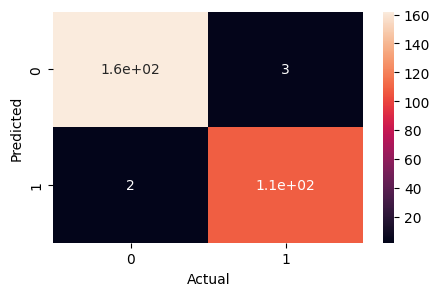

In [15]:
# Evaluating the performance
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, roc_auc_score, confusion_matrix
print("Model accuracy score: ", accuracy_score(target_test, target_pred))
print("Model precision score: ", precision_score(target_test, target_pred, average='macro'))
print("Model f1 score: ", f1_score(target_test, target_pred, average='macro'))
print("Model recall score: ", recall_score(target_test, target_pred, average='macro'))
print("Model roc-auc score: ", roc_auc_score(target_test, target_pred, multi_class='ovo'))
print("Model confusion matrix: ", confusion_matrix(target_test, target_pred))
# To find where the model made mistakes
import seaborn as sn
plt.figure(figsize=(5,3))
sn.heatmap(confusion_matrix(target_test, target_pred), annot=True)
plt.xlabel("Actual")
plt.ylabel("Predicted")